# Module 3: Exploration data analysis of train a model by given attributes

In [1]:
#import libraries for access and functional purpose
import pandas as p
import numpy as n
import matplotlib.pyplot as plt
import seaborn as s

In [2]:
#read the given dataset
df2 = p.read_csv("dataset/test1.csv")
df1 = p.read_csv("dataset/train1.csv")

In [3]:
df1.dropna()

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,0,udp,other,SF,146,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,1,0,tcp,private,S0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,2,0,tcp,http,SF,232,8153,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,3,0,tcp,http,SF,199,420,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,4,0,tcp,private,REJ,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0,tcp,http,SF,209,3556,0,0,0,...,1.00,0.00,0.04,0.04,0.00,0.00,0.0,0.00,normal,21
996,996,0,tcp,private,S0,0,0,0,0,0,...,0.03,0.07,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
997,997,0,tcp,private,S0,0,0,0,0,0,...,0.02,0.07,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
998,998,0,tcp,http,SF,229,934,0,0,0,...,1.00,0.00,0.20,0.05,0.00,0.01,0.0,0.00,normal,21


In [4]:
df1.head()

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,0,udp,other,SF,146,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,1,0,tcp,private,S0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,2,0,tcp,http,SF,232,8153,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,3,0,tcp,http,SF,199,420,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,4,0,tcp,private,REJ,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


# Spliting Train/Test:

In [5]:
#preprocessing, split test and dataset, split response variable
X = df1.drop(labels='attack', axis=1)
#Response variable
y = df1.loc[:,'attack'] 
y.head()

0     normal
1    neptune
2     normal
3     normal
4    neptune
Name: attack, dtype: object

In [8]:
#We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("Number of training dataset: ", len(X_train))
print("Number of testing dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))


Number of training dataset:  700
Number of testing dataset:  300
Total number of dataset:  1000


Text(0, 0.5, 'Strength values')

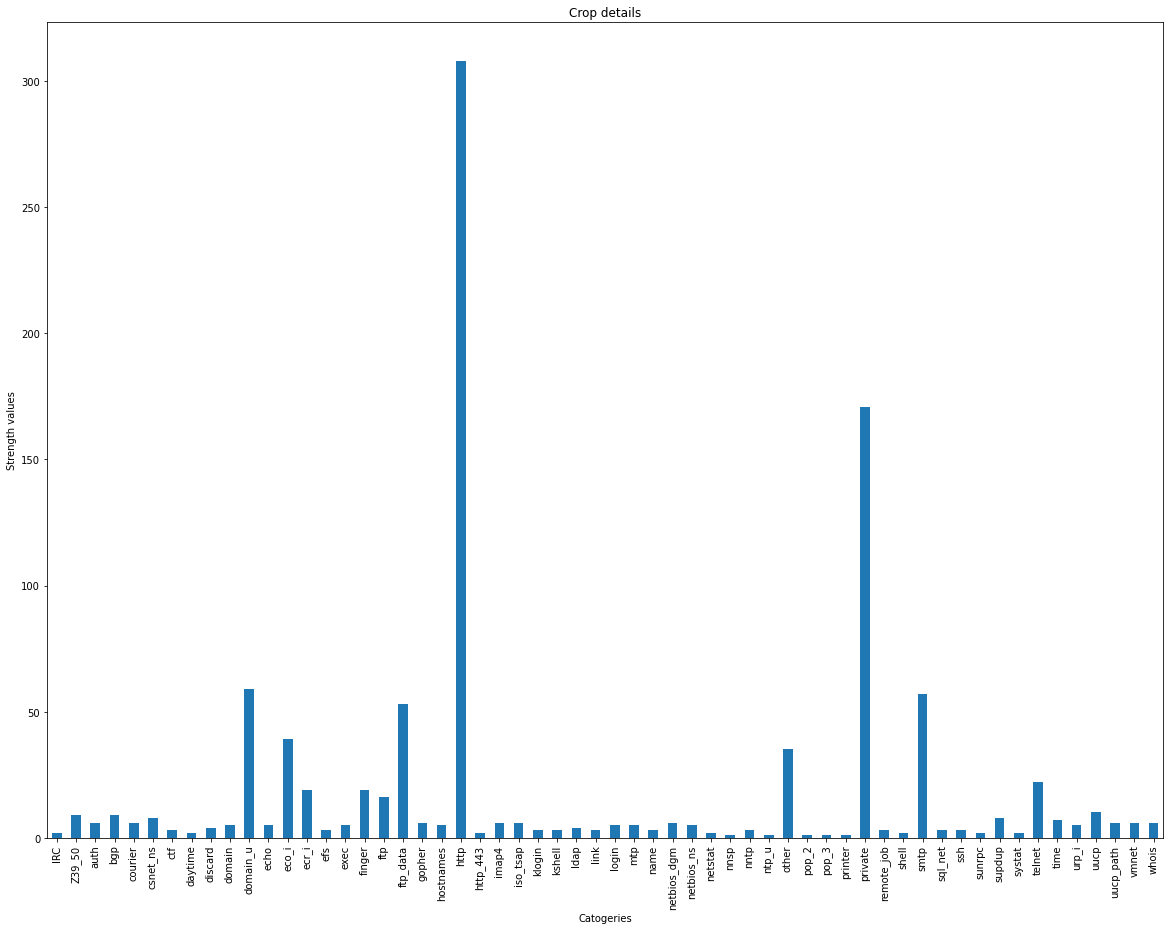

In [16]:
count_classes = p.value_counts(df1['service'], sort = True).sort_index()
count_classes.plot(kind = 'bar', figsize=(20,15))
plt.title("Service details")
plt.xlabel("Catogeries")
plt.ylabel("Strength values")

Text(0, 0.5, 'Strength values')

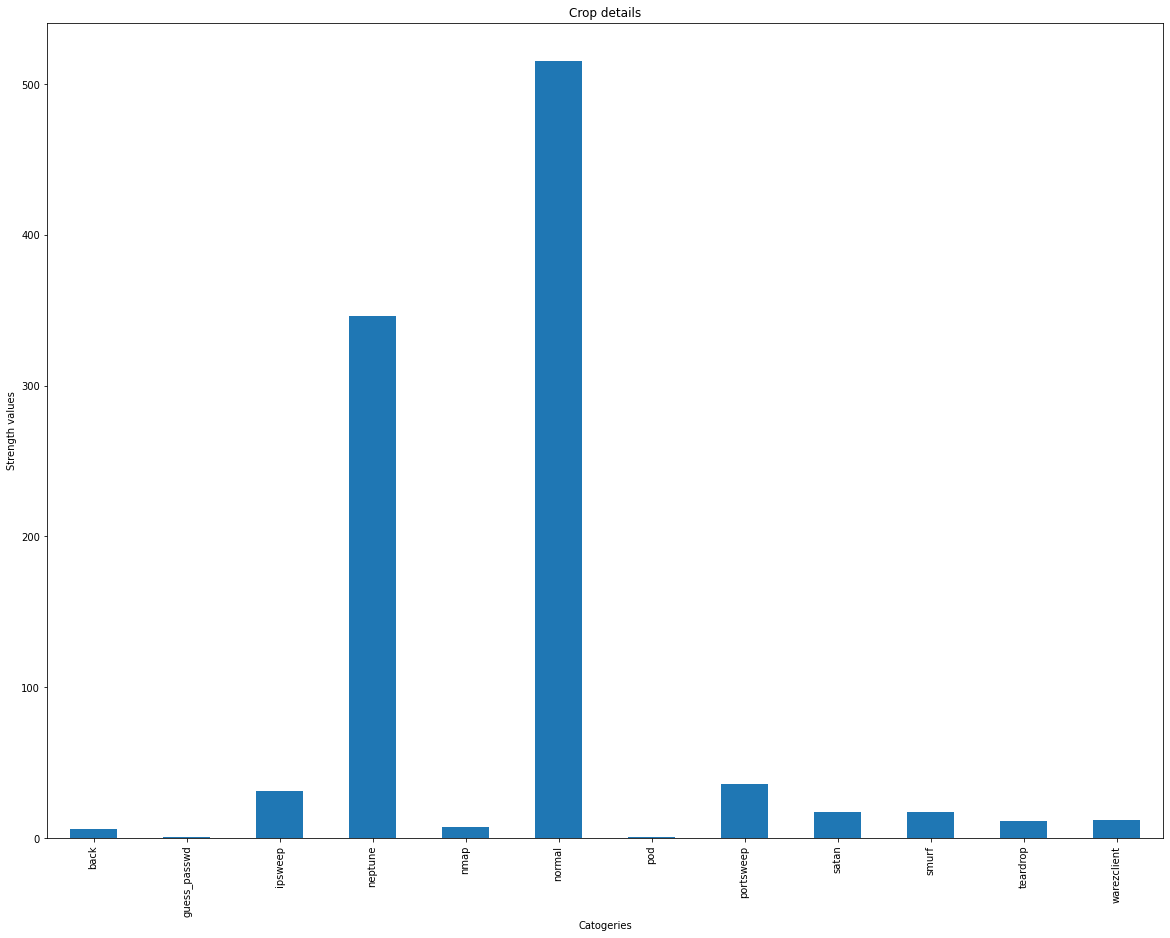

In [17]:
count_classes = p.value_counts(df1['attack'], sort = True).sort_index()
count_classes.plot(kind = 'bar', figsize=(20,15))
plt.title("Attack details")
plt.xlabel("Catogeries")
plt.ylabel("Strength values")

Text(0.5, 1.0, 'Prediction results for Normal connection and attack')

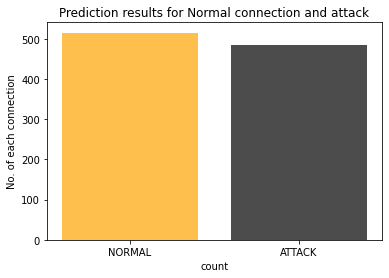

In [12]:

normal=sum(df1['attack']=='normal')
attack=sum(df1['attack']!='normal')
colors=['orange','black']
locations=[1,2]
heights=[normal,attack]
labels=['NORMAL','ATTACK']
plt.bar(locations,heights,color=colors,tick_label=labels,alpha=0.7)
plt.xlabel('count')
plt.ylabel('No. of each connection')
plt.title('Prediction results for Normal connection and attack')

Text(0.5, 1.0, 'Normal and Attack counts')

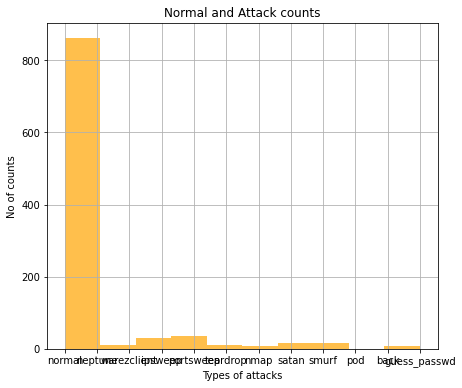

In [13]:
df1['attack'].hist(figsize=(7,6), color='orange', alpha=0.7)
plt.xlabel('Types of attacks')
plt.ylabel('No of counts')
plt.title('Normal and Attack counts')

<AxesSubplot:>

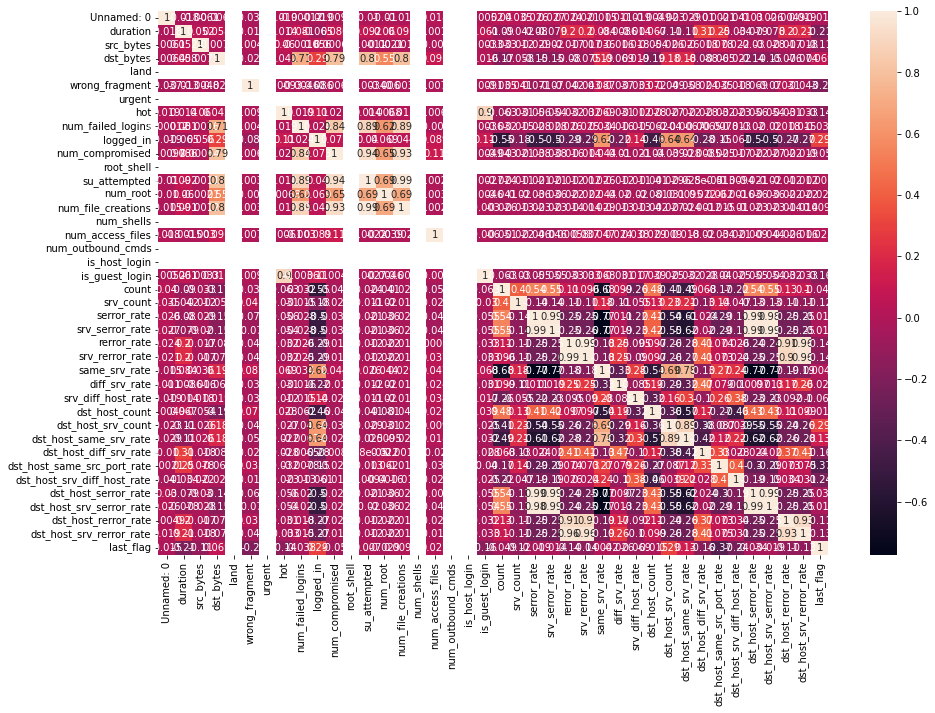

In [14]:
# Heatmap plot diagram
fig, ax = plt.subplots(figsize=(15,10))
s.heatmap(df1.corr(), ax=ax, annot=True)

tcp     82.9
udp     10.8
icmp     6.3
Name: protocol_type, dtype: float64

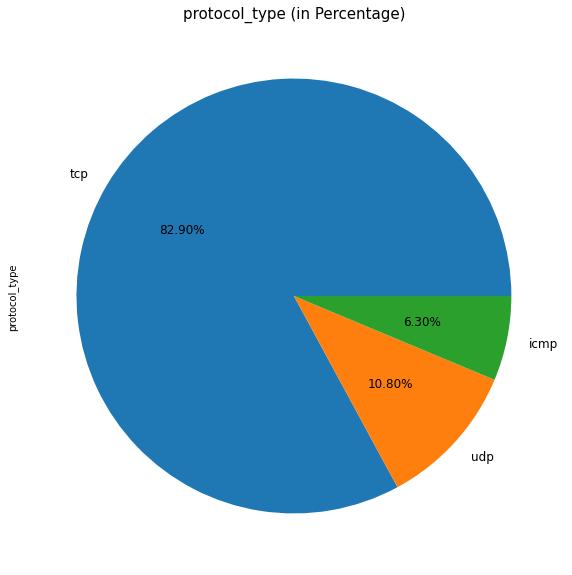

In [31]:
#Propagation by variable
def PropByVar(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12)
    ax.set_title(variable + ' (in Percentage)', fontsize = 15)
    return n.round(dataframe_pie/df.shape[0]*100,2)

PropByVar(df1, 'protocol_type')

normal          51.5
neptune         34.6
portsweep        3.6
ipsweep          3.1
smurf            1.7
satan            1.7
warezclient      1.2
teardrop         1.1
nmap             0.7
back             0.6
pod              0.1
guess_passwd     0.1
Name: attack, dtype: float64

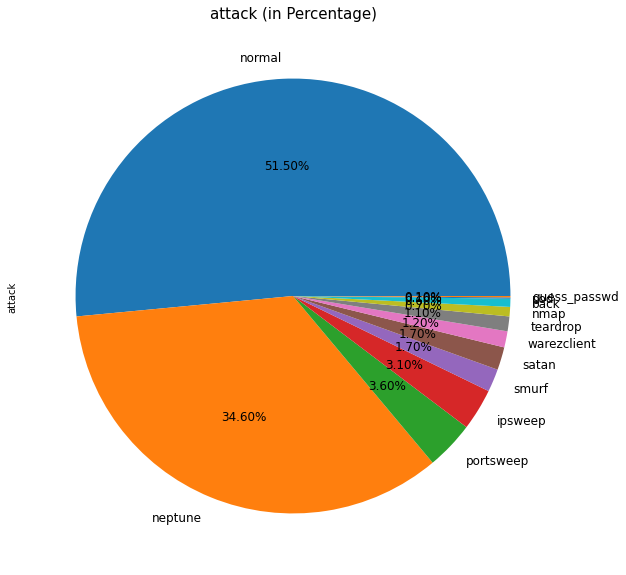

In [32]:
#Propagation by variable
def PropByVar(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12)
    ax.set_title(variable + ' (in Percentage)', fontsize = 15)
    return n.round(dataframe_pie/df.shape[0]*100,2)


PropByVar(df1, 'attack')

In [41]:

def y_No_y_bar_plot(df, bygroup):
    dataframe_by_Group = p.crosstab(df[bygroup], columns=df["attack"], normalize = 'index')
    dataframe_by_Group = n.round((dataframe_by_Group * 100), decimals=2)
    ax = dataframe_by_Group.plot.bar(figsize=(10,5));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(dataframe_by_Group.index,rotation = 0, fontsize = 15);
    ax.set_title('Attack Vs Normal connection in (%) (by ' + dataframe_by_Group.index.name + ')\n', fontsize = 15)
    ax.set_xlabel(dataframe_by_Group.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

    # Add Data Labels

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2, 
                str(height)+'%', 
                ha='center', 
                va='bottom',
                fontsize = 12)
    return dataframe_by_Group


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


attack,back,guess_passwd,ipsweep,neptune,nmap,normal,pod,portsweep,satan,smurf,teardrop,warezclient
protocol_type,,,,,,,,,,,,
icmp,0.00,0.00,42.86,0.00,7.94,20.63,1.59,0.00,0.00,26.98,0.00,0.00
tcp,0.72,0.12,0.48,41.74,0.24,49.46,0.00,4.34,1.45,0.00,0.00,1.45
udp,0.00,0.00,0.00,0.00,0.00,85.19,0.00,0.00,4.63,0.00,10.19,0.00


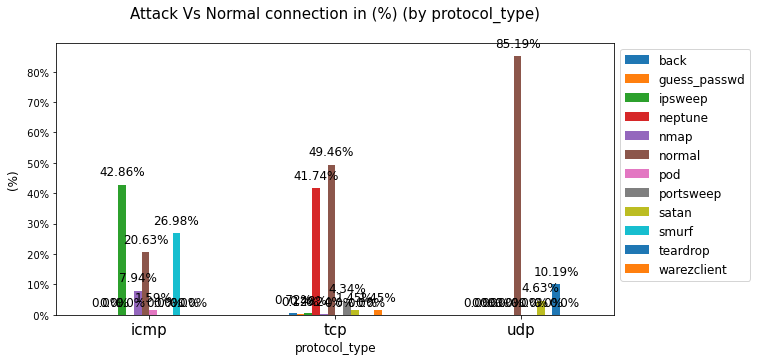

In [42]:
y_No_y_bar_plot(df1, 'protocol_type')